## Introduction

In this notebook we will build a Neural Network multi-class classification model using a dataset popularly known as 'MNIST'

### About the Data

MNIST (**Modified National Institute of Standards and Technology database**) is a large database of 70,000 handwritten digits.

It has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST (National Institute of Standards and Technology).

The objective here is to build a model that would recognize the correct digit that the given image is representing.

## Objective 
Using a straightforward neural network with only input and output layers, we will classify handwritten digits in this notebook. After that, we'll add a hidden layer and assess how the model performs.

In [1]:
# loading various libraries 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
from tensorflow.keras.datasets.mnist import load_data #loading minist dataset 

(X_train, y_train) , (X_test, y_test) = load_data() # Loading data

In [3]:
# checking various data points available for train and testing 
print("For training images are: ",len(X_train))
print("For testing  images are: ",len(X_test))

For training images are:  60000
For testing  images are:  10000


In [4]:
#checking the shape 
X_train.shape 

(60000, 28, 28)

In [5]:
#shape of one image 
X_train[0].shape

(28, 28)

each image shape is 28*28 

In [6]:
#oberving one image 
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

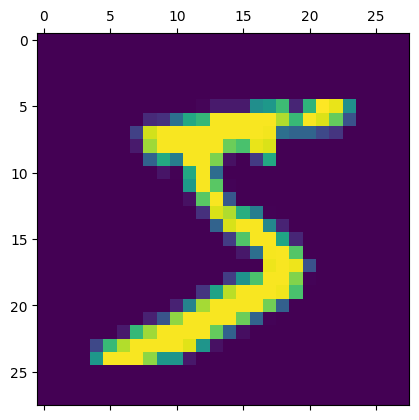

In [7]:
#using matshow() for a better view 
plt.matshow(X_train[0])

In [8]:
#confirming if the image there is a 5 
y_train[0]

5

### Data processing 

Our data, including both X train and X test, should be normalized. The process of normalization reduces the range of pixel intensity values to a range of 0 to 1. 

However, why normalize? 

In order to prevent mental diversion and lessen data redundancy, normalization seeks to create consistency in dynamic range for a set of data, signals, or images. You can enhance the performance of your model by standardizing the data as well.

In [9]:
#Why divided by 255? The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value.
X_train = X_train / 255
X_test = X_test / 255


In [10]:
# lets observe if our range is between 0 to 1 
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
# Flattening the data 
#coverting from 2D to 1D
X_train_flattened = X_train.reshape(len(X_train), 28*28)

X_test_flattened = X_test.reshape(len(X_test), 28*28)

#lets observe the shape 
X_train_flattened.shape

(60000, 784)

### Build Model 

Having an hidden layer enables increase in our accuracy

lets observe the difference between not having and having an hidden layer 

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model =Sequential()
model.add(Dense(10, input_shape=(784,), activation='sigmoid'))
model.compile(optimizer ="Adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

model.fit(X_train_flattened,y_train, epochs = 5)

Metal device set to: Apple M2


2023-01-06 11:26:35.156592: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-06 11:26:35.156779: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2023-01-06 11:26:35.485787: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-06 11:26:35.644948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4615 - accuracy: 0.8799
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3026 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2830 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2732 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2664 - accuracy: 0.9259


In [13]:
# lets evaluate our model using the X_test_flattened
model.evaluate(X_test_flattened,y_test)

 29/313 [=>............................] - ETA: 1s - loss: 0.2664 - accuracy: 0.9235

2023-01-06 11:27:15.050855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.2686 - accuracy: 0.9256


[0.26861390471458435, 0.9256000518798828]

Th model accuracy with no hideen layer is 92.54%. very nice!

In [14]:
#lets predict 
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

117/313 [==========>...................] - ETA: 0s

2023-01-06 11:27:16.366747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


array([4.9949068e-01, 4.0683984e-03, 9.9952519e-01, 3.5421547e-01,
       5.4370575e-10, 8.3563852e-01, 9.0405309e-01, 1.0725356e-12,
       1.8582082e-01, 2.4859310e-09], dtype=float32)

In [15]:
# lets get argmax- finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[1])


2

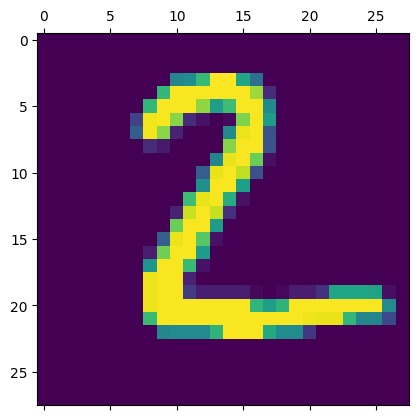

In [16]:
#lets observe the original digit 
plt.matshow(X_test[1])

#### lets add hidden layers 

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model =Sequential()
model.add(Dense(100, input_shape=(784,), activation='relu'))
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.compile(optimizer ="Adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

earlystopping_callback = EarlyStopping( monitor='val_loss',patience=5 )
model.fit(X_train_flattened,y_train,batch_size = 128 ,epochs = 30, validation_split=0.2,callbacks=[earlystopping_callback])

Epoch 1/30
 11/375 [..............................] - ETA: 1s - loss: 2.4165 - accuracy: 0.1861  

2023-01-06 12:54:12.630468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


374/375 [============================>.] - ETA: 0s - loss: 0.5987 - accuracy: 0.8502

2023-01-06 12:54:14.645280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 6ms/step - loss: 0.5979 - accuracy: 0.8504 - val_loss: 0.2464 - val_accuracy: 0.9319
Epoch 2/30
375/375 [==============================] - 2s 6ms/step - loss: 0.2156 - accuracy: 0.9385 - val_loss: 0.1763 - val_accuracy: 0.9495
Epoch 3/30
375/375 [==============================] - 2s 6ms/step - loss: 0.1555 - accuracy: 0.9545 - val_loss: 0.1417 - val_accuracy: 0.9590
Epoch 4/30
375/375 [==============================] - 2s 6ms/step - loss: 0.1204 - accuracy: 0.9649 - val_loss: 0.1224 - val_accuracy: 0.9635
Epoch 5/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0958 - accuracy: 0.9720 - val_loss: 0.1058 - val_accuracy: 0.9667
Epoch 6/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0779 - accuracy: 0.9769 - val_loss: 0.0960 - val_accuracy: 0.9695
Epoch 7/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0646 - accuracy: 0.9811 - val_loss: 0.0932 - val_accuracy: 0.9716
Epoch 8/30
375/37

**The accuracy of the model is at 97%***

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Evaluating the model
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0837 - accuracy: 0.9773


[0.08372862637042999, 0.9773000478744507]

**After Evaluating the model we see that the acccuracy is 97.73%, Which essentialy is 98% as such the model can be used to carry out predictions**

In [23]:
y_predict = model.predict(X_test_flattened)

 88/313 [=======>......................] - ETA: 0s

2023-01-06 12:55:44.619256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [24]:
np.argmax(y_predict[2])

1

In [25]:
y_predict_lables = [np.argmax(i) for i in y_predict]

In [26]:
y_predict_lables[:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

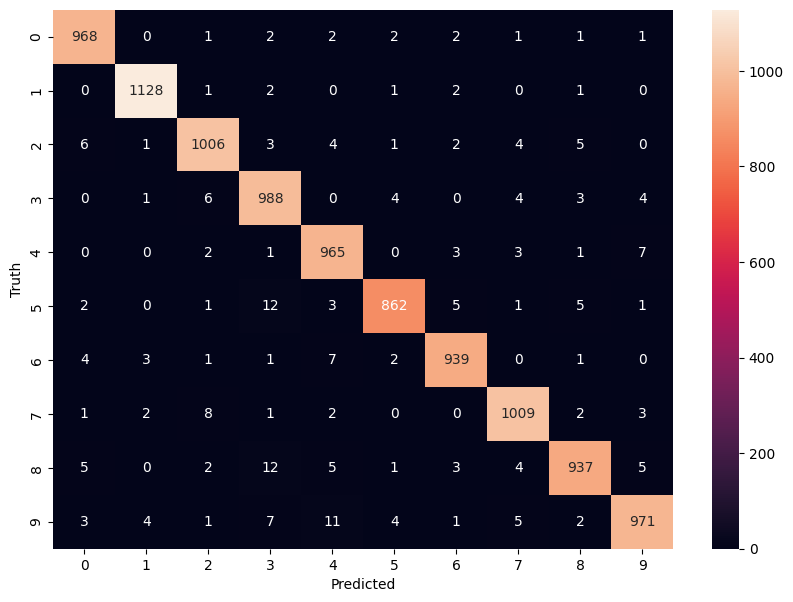

In [27]:
#ploting a confusion a matrix
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_lables)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**lets understand the confusion matrix using 2-truth and 0 - predicted.6 times it was 2 but the model predicted its  0.Hence the numbers in the diagnol its the number of times the model predicted each value correctly and outside are the errors basically what the model got wrong**

In [28]:
#Make a pickle file of our model
import pickle
pickle.dump(model, open("model.pkl", "wb"))

INFO:tensorflow:Assets written to: ram://afcd7f3b-8acc-4526-a540-72d880727f4a/assets
